# Cancer_Type Gene Prediction - Sagnik Ghosh

In [1]:
# Importing libraries
import numpy as np
import pandas as pd

In [2]:
train_df= pd.read_csv('data_set_ALL_AML_train.csv')

In [3]:
test_df= pd.read_csv('data_set_ALL_AML_independent.csv')

In [4]:
# removing all call columns from data frame
train_columns = [col for col in train_df if "call" not in col]

In [5]:
train_df = train_df[train_columns]

In [6]:
train_df = train_df.set_index("Gene Accession Number").T

In [7]:
import re

In [8]:
train_d= [col for col in train_df if not re.match("^AFFX", col)]

In [9]:
train_df = train_df[train_d]

In [10]:
train_df = train_df.drop(["Gene Description"])

In [11]:
train_df.head()

Gene Accession Number,hum_alu_at,A28102_at,AB000114_at,AB000115_at,AB000220_at,AB000409_at,AB000449_at,AB000450_at,AB000460_at,AB000462_at,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,15091,151,72,281,36,-299,57,186,1647,137,...,185,511,-125,389,-37,793,329,36,191,-37
2,11038,263,21,250,43,-103,169,219,2043,188,...,169,837,-36,442,-17,782,295,11,76,-14
3,16692,88,-27,358,42,142,359,237,1997,91,...,315,1199,33,168,52,1138,777,41,228,-41
4,15763,484,61,118,39,-11,274,245,2128,-82,...,240,835,218,174,-110,627,170,-50,126,-91
5,18128,118,16,197,39,237,311,186,1608,204,...,156,649,57,504,-26,250,314,14,56,-25


In [12]:
def transformation(df):
    df_columns = [col for col in df.columns if "call" not in col]
    df = df[df_columns]
    df = df.set_index("Gene Accession Number").T
    dftag= [col for col in df if not re.match("^AFFX", col)]
    df = df[dftag]
    df = df.drop(["Gene Description"])
    return df

In [13]:
test_df= transformation(test_df)

In [14]:
train_df= train_df.replace(np.inf, np.nan)

In [15]:
train_df.isnull().sum()[train_df.isnull().sum()> 0]

Series([], dtype: int64)

In [16]:
cancer_types = pd.read_csv('actual.csv')

In [17]:
# Reset the index. The indexes of two dataframes need to be the same before you combine them
train_df = train_df.reset_index(drop=True)

# Subset the first 38 patient's cancer types
ct_train = cancer_types[cancer_types.patient <= 38].reset_index(drop=True)

# Combine dataframes for first 38 patients: Patient number + cancer type + gene expression values
train_df = pd.concat([ct_train,train_df], axis=1)

In [18]:
train_df.tail()

,patient,cancer,hum_alu_at,A28102_at,AB000114_at,AB000115_at,AB000220_at,AB000409_at,AB000449_at,AB000450_at,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
33,34,AML,26052,318,1,103,-61,39,181,47,...,173,492,54,277,-13,279,51,6,2484,-2
34,35,AML,11983,382,1,239,72,377,96,173,...,225,737,63,472,33,737,227,-9,371,-31
35,36,AML,23508,486,-23,221,39,-14,120,285,...,36,592,57,215,-22,588,361,-26,133,-32
36,37,AML,17996,388,56,405,192,-31,36,113,...,348,938,-15,433,-2,1170,284,39,298,-3
37,38,AML,19679,260,-27,1306,32,-349,255,115,...,209,634,-58,375,-23,2315,250,-12,790,-10


In [19]:
def label(df):
    df= df.reset_index(drop= True)
    ct_test = cancer_types[cancer_types.patient > 38].reset_index(drop=True)
    df = pd.concat([ct_train,df], axis=1)
    return df

In [20]:
train_df.isnull().sum()

patient        0
cancer         0
hum_alu_at     0
A28102_at      0
AB000114_at    0
              ..
X83863_at      0
Z17240_at      0
L49218_f_at    0
M71243_f_at    0
Z78285_f_at    0
Length: 7073, dtype: int64

In [21]:
train_df.dtypes

patient         int64
cancer         object
hum_alu_at      int64
A28102_at       int64
AB000114_at     int64
                ...  
X83863_at       int64
Z17240_at       int64
L49218_f_at     int64
M71243_f_at     int64
Z78285_f_at     int64
Length: 7073, dtype: object

In [22]:
test_df= label(test_df)

In [23]:
train_df['cancer']= train_df.cancer.map({'ALL': 0, 'AML': 1})

In [24]:
test_df['cancer']= test_df.cancer.map({'ALL': 0, 'AML': 1})

In [25]:
for col in train_df.columns:
    train_df[col]= pd.to_numeric(train_df[col])

In [26]:
for col in test_df.columns:
    test_df[col]= pd.to_numeric(test_df[col])

In [27]:
train_df['cancer']= train_df['cancer'].astype('category')

In [28]:
statistic= train_df.groupby('cancer').describe()

In [29]:
zero= train_df[train_df.cancer== 0].describe().T

In [30]:
zero.columns

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [31]:
zero['avg']= zero['std']/zero['mean']

In [32]:
one = train_df[train_df.cancer== 1].describe().T

In [33]:
one['avg']= one['std']/one['mean']

In [34]:
kl= (zero['avg']-one['avg']).abs().sort_values(ascending= False)[5:15].index

<AxesSubplot:xlabel='cancer'>

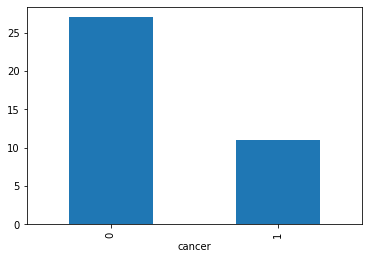

In [35]:
outcomes = train_df.groupby('cancer').size()
outcomes.plot(kind = 'bar')

In [36]:
x_train = train_df.iloc[:,2:]
y_train = train_df.iloc[:,1]

In [37]:
x_test = test_df.iloc[:,2:]
y_test = test_df.iloc[:,1]

In [38]:
p1= x_train[kl]

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [40]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


## EDA

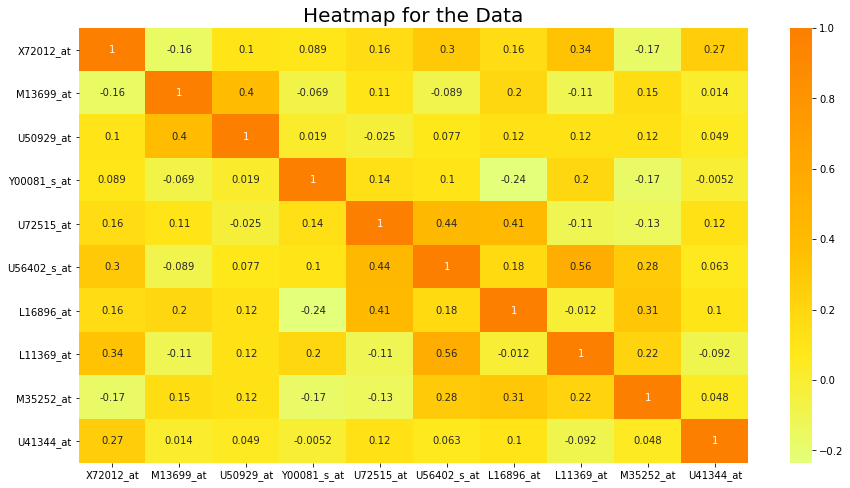

In [41]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(p1.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.savefig('correlation');

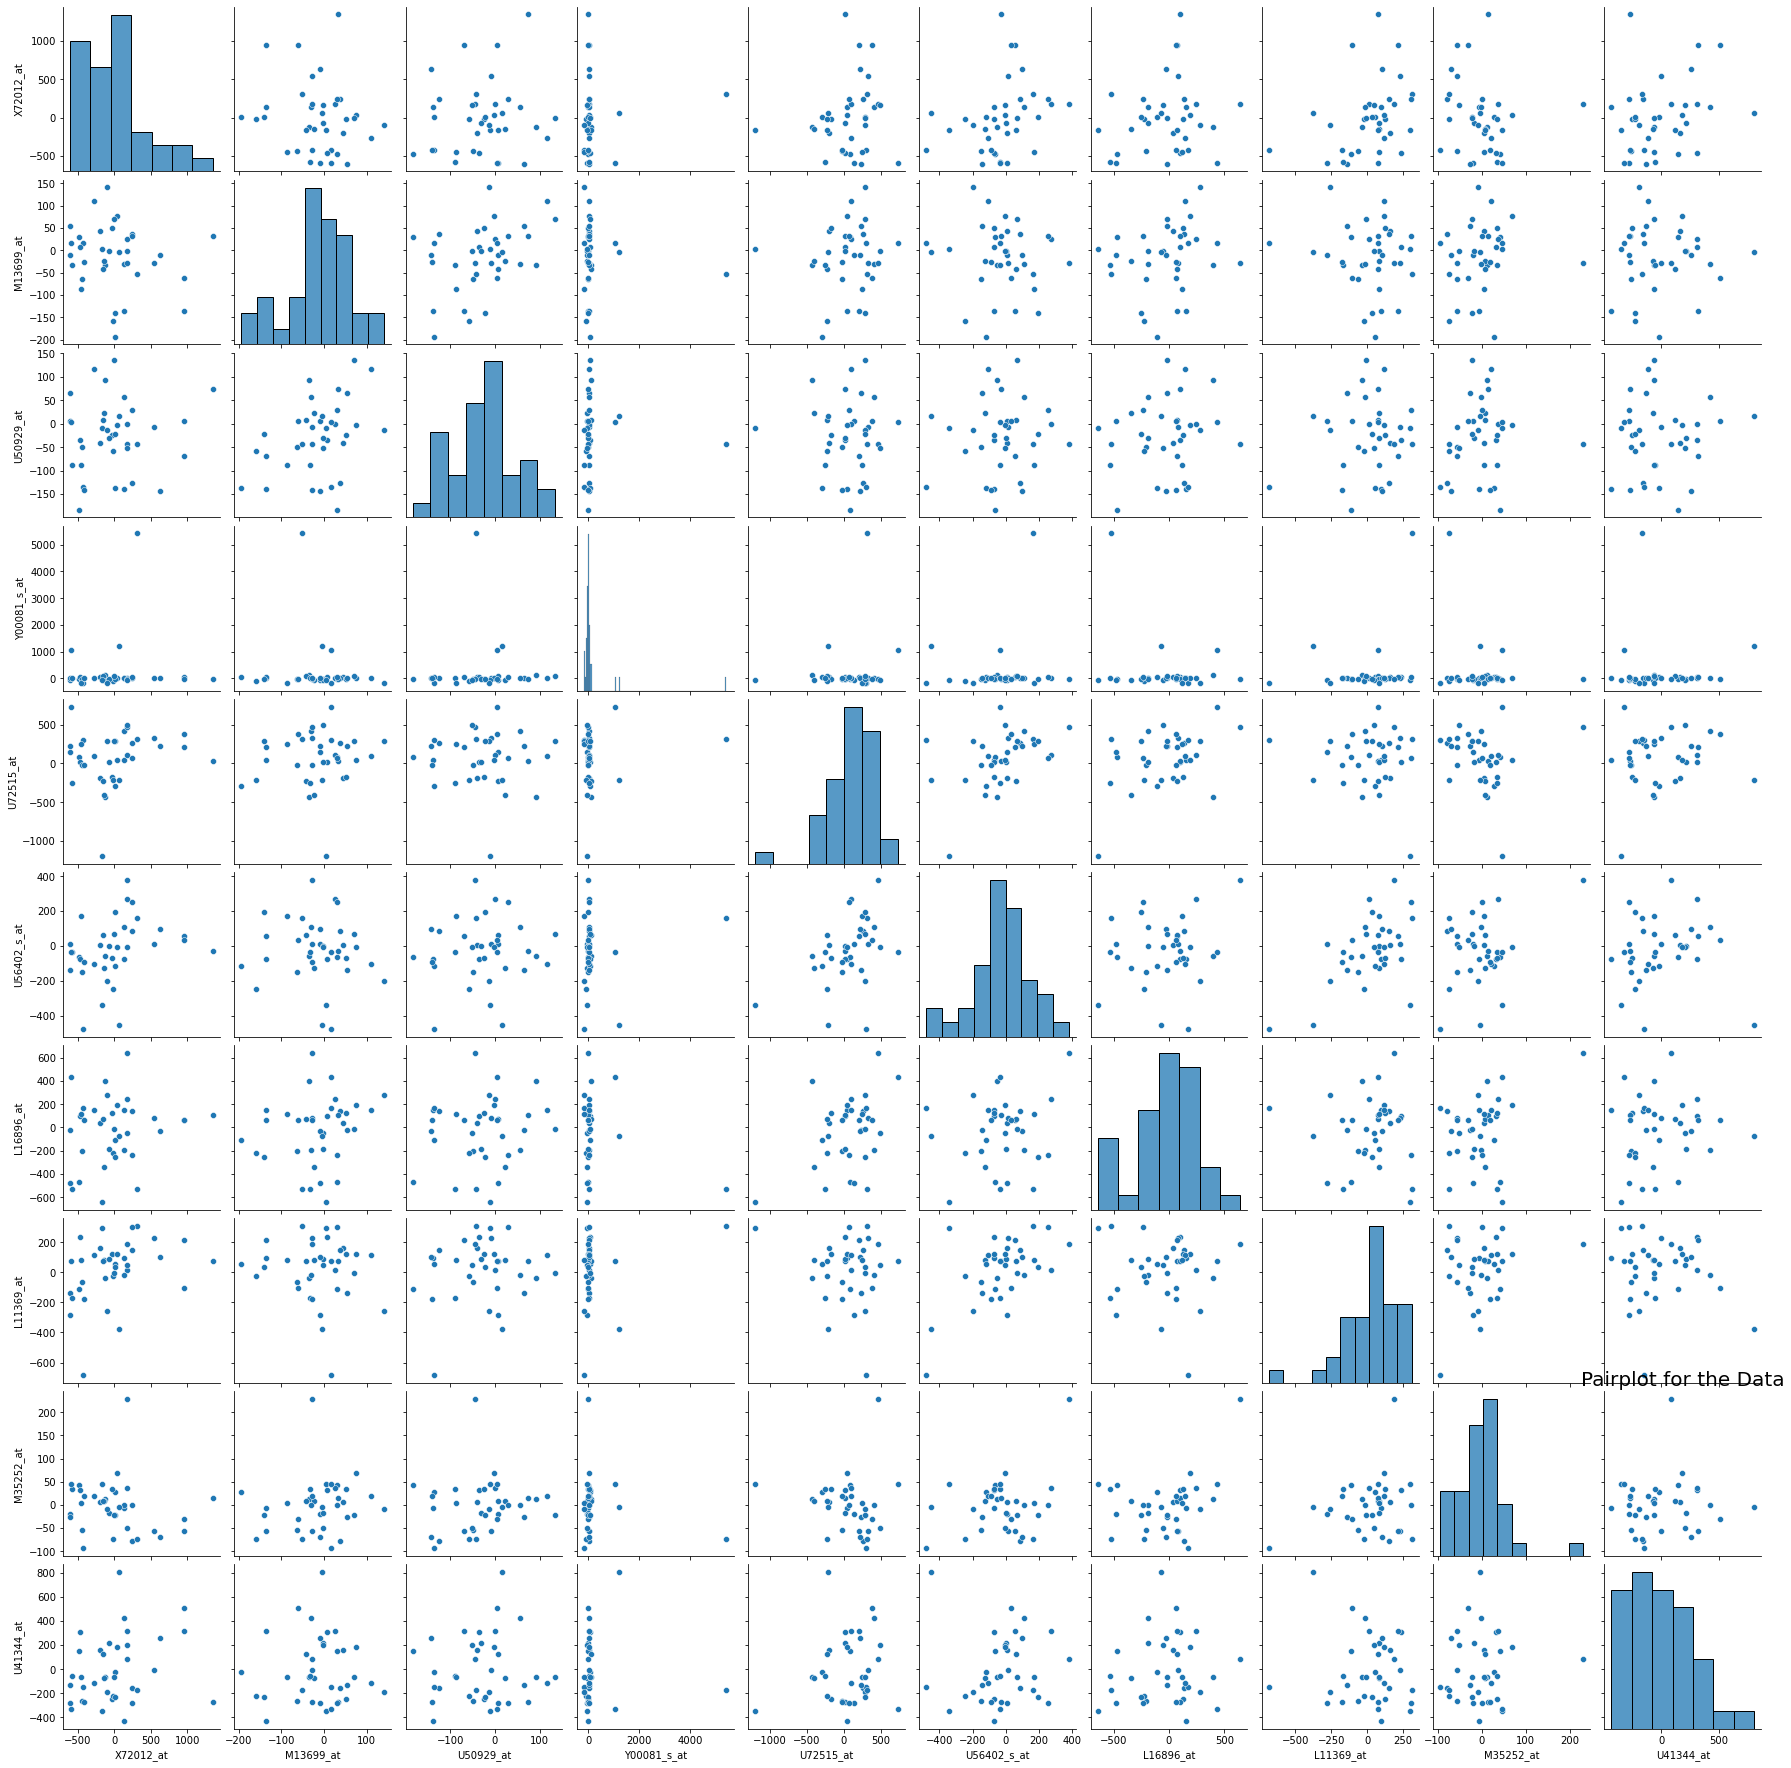

In [42]:
sns.pairplot(p1)
plt.title('Pairplot for the Data', fontsize = 20)
plt.savefig('correlation1');

### Group-wise Plotting

In [43]:
p2= pd.concat([train_df[['cancer']], train_df[kl]], axis= 1)

p3= p2[p2.cancer== 0]
p4= p2[p2.cancer== 1]
p3= p3.drop('cancer', axis= 1)
p4= p4.drop('cancer', axis= 1)
k= pd.DataFrame(p3.stack())
k= k.reset_index()

k.columns= ['patient', 'fields', 'values']
p4= pd.DataFrame(p4.stack())
p4= p4.reset_index()
p4.columns= ['patient', 'fields', 'values']

C:\Users\KIIT\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\KIIT\Anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\KIIT\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\KIIT\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The or

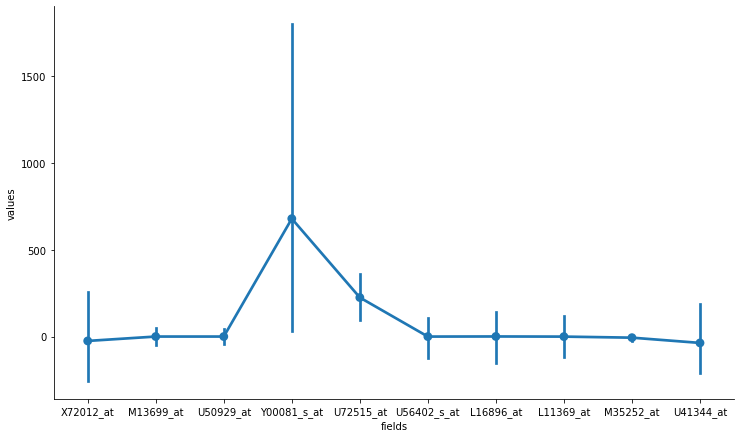

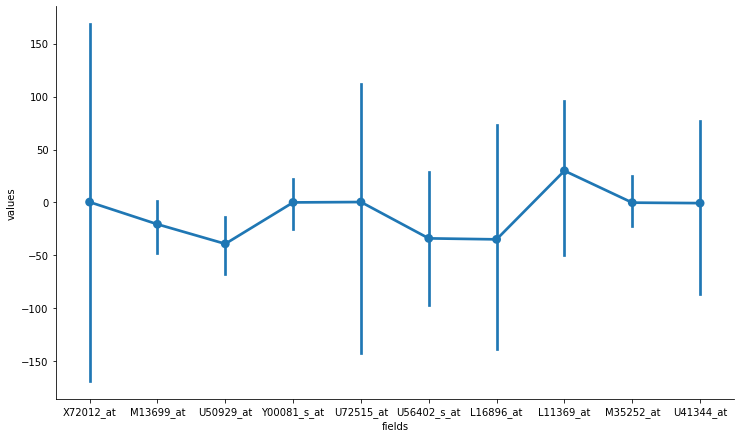

In [44]:
sns.factorplot('fields','values',data=p4, size=6, aspect=1.7, legend=False)

sns.factorplot('fields','values',data=k, size=6, aspect=1.7, legend=False)

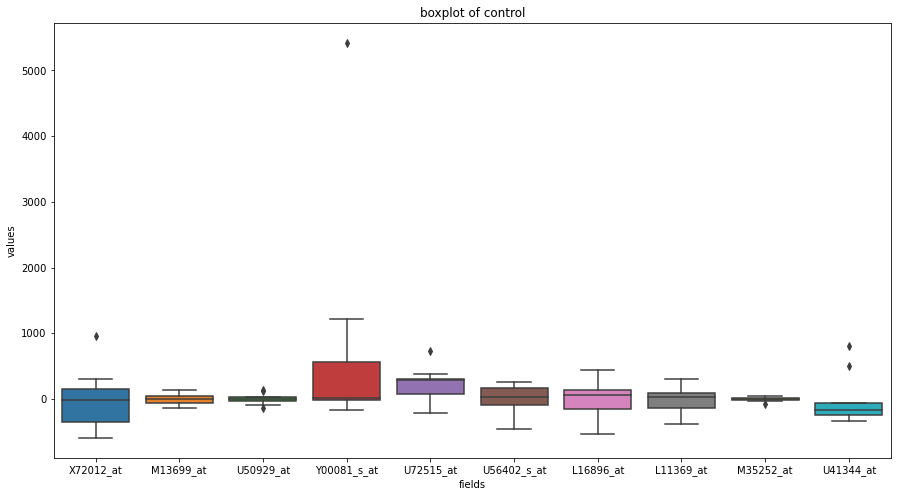

In [45]:
sns.boxplot(x="fields", y="values", data=p4)
plt.title('boxplot of control')
plt.show()

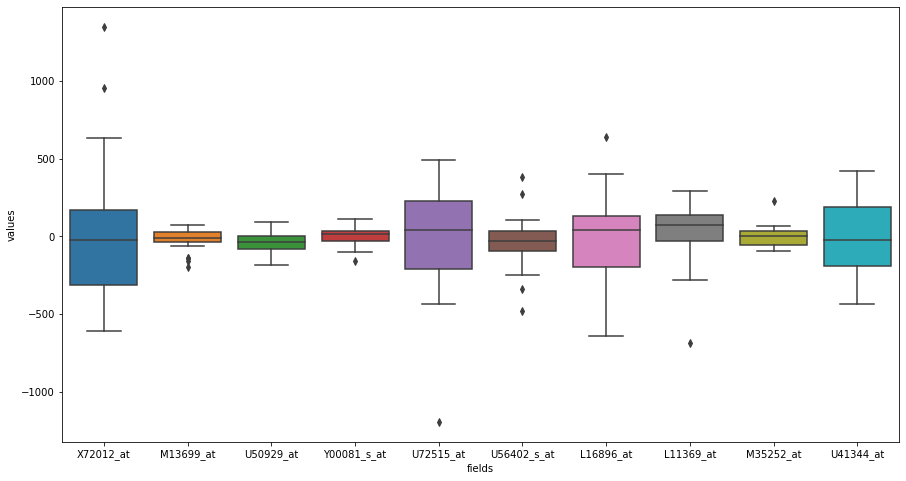

In [46]:
plt4= sns.boxplot(x="fields", y="values", data=k)

In [47]:
import matplotlib.pyplot as plt

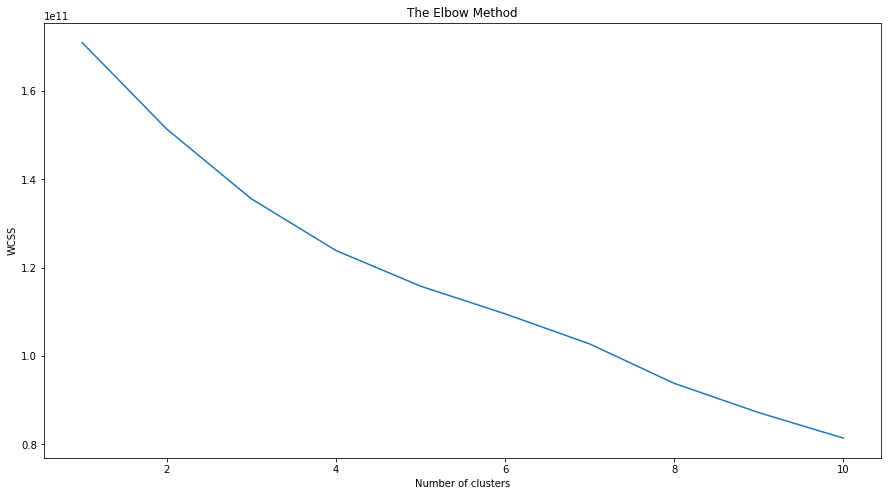

In [48]:
# Using the elbow method to find  the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [49]:
# Applying k-means to the cars dataset
kmeans = KMeans(n_clusters=2,init='k-means++',max_iter=300,n_init=10,random_state=0) 
y_kmeans = kmeans.fit_predict(x_train)

# X = (x_train).[[as_matrix(columns=None)]]
X = (x_train).values

In [50]:
y_kmeans== 0, 1

(array([ True, False,  True,  True,  True,  True,  True,  True, False,
         True,  True,  True,  True,  True,  True,  True, False,  True,
         True, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True, False, False,  True, False,  True, False,  True,
        False, False]),
 1)

In [51]:
y_kmeans

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1])

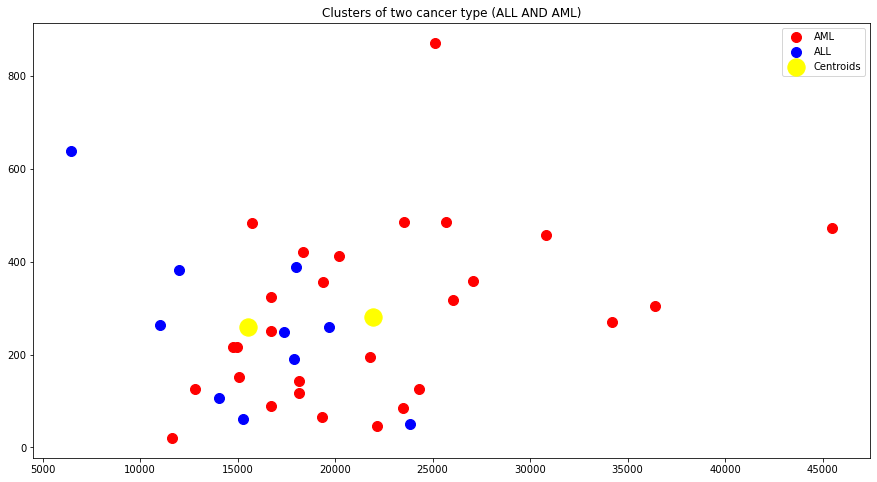

In [52]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1],s=100,c='red',label='AML')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1],s=100,c='blue',label='ALL')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Clusters of two cancer type (ALL AND AML)')
plt.legend()
plt.show()

In [53]:
from sklearn.neighbors import KNeighborsClassifier
def knn_pred(train_predictors, train_outcome, k_range, test_predictors):
    #train_predictors and train_outcome should both be from training split while test_predictors should be from test split
    y_pred = []
    for i in k_range:
        knn = KNeighborsClassifier(n_neighbors = i)
        knn.fit(train_predictors, train_outcome)
        y_pred.append(knn.predict(test_predictors))
    return y_pred

In [54]:
from sklearn.metrics import accuracy_score

In [55]:
#function compares KNN accuracy at different levels of K
def knn_accuracy(pred, k_range, test_outcome):
    #pred represents predicted values while test_outcome represents the values from the test set
    accuracy_chart = []
    for i in range(len(k_range)):
        accuracy_chart.append((accuracy_score(test_outcome, pred[i])))
    return accuracy_chart

In [56]:
x_test= x_test.fillna(method= 'ffill')

Text(0.5, 0, 'Number of Neighborhoods')

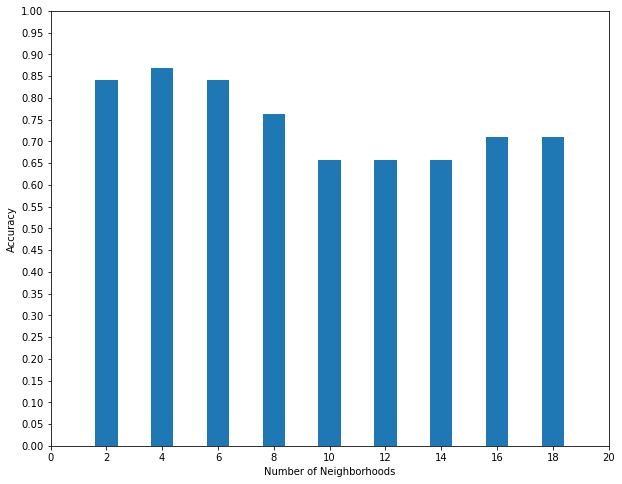

In [57]:
train_range = range(2, 20, 2)
sample_pred = knn_pred(x_train, y_train, train_range, x_test)
accuracy = knn_accuracy(sample_pred, train_range, y_test)
plt.figure(figsize=(10, 8))
plt.bar(train_range, accuracy)
plt.ylim(0,1)
plt.xlim(0,20)
plt.locator_params(axis='y', nbins=20)
plt.locator_params(axis = 'x', nbins = 10)
plt.ylabel("Accuracy")
plt.xlabel("Number of Neighborhoods")

In [58]:
x_train.shape

(38, 7071)

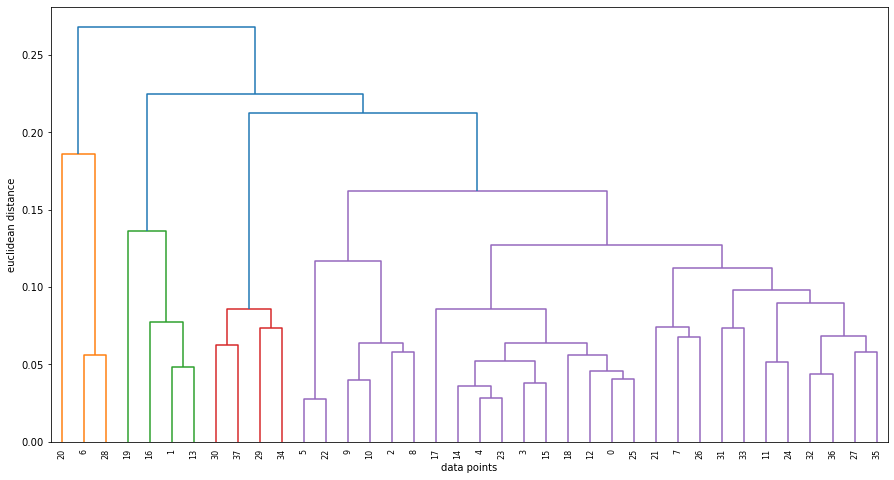

In [59]:
from scipy.cluster.hierarchy import linkage, dendrogram
merg = linkage(x_train,method="complete", metric= 'cosine')
dendrogram(merg,leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()